In [308]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [309]:
file_path = r"C:\Users\dipak\OneDrive\Desktop\Journey_AI\IBM AI ENgineer\gen_AI\data_analysis\3_module\laptop_pricing_dataset_mod1.csv"

In [310]:
df = pd.read_csv(file_path, index_col=0)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [311]:
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_cm  234 non-null    float64
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       233 non-null    float64
 11  Price           238 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 24.2+ KB


In [313]:
X_columns_name = ["CPU_frequency","Screen_Size_cm","Weight_kg"]
y_columns_name = ["Price"]

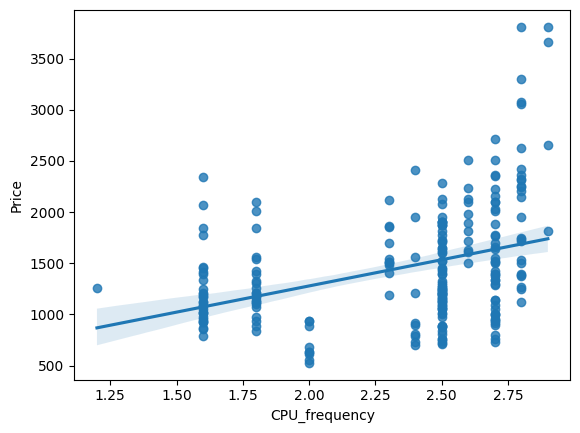

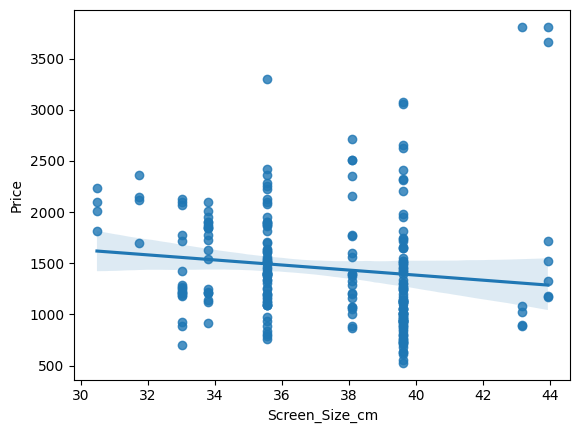

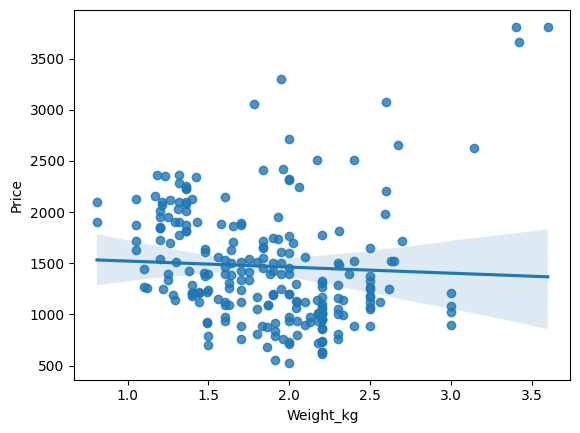

In [314]:
for column in X_columns_name:
    sns.regplot(x=column, y=y_columns_name[0],data=df)
    plt.show()


In [315]:
data_corr = df[X_columns_name+y_columns_name].corr()

In [316]:
data_corr

,CPU_frequency,Screen_Size_cm,Weight_kg,Price
CPU_frequency,1.000000,-0.002288,0.067409,0.366666
Screen_Size_cm,-0.002288,1.000000,0.825341,-0.128233
Weight_kg,0.067409,0.825341,1.000000,-0.050707
Price,0.366666,-0.128233,-0.050707,1.000000


<Axes: >

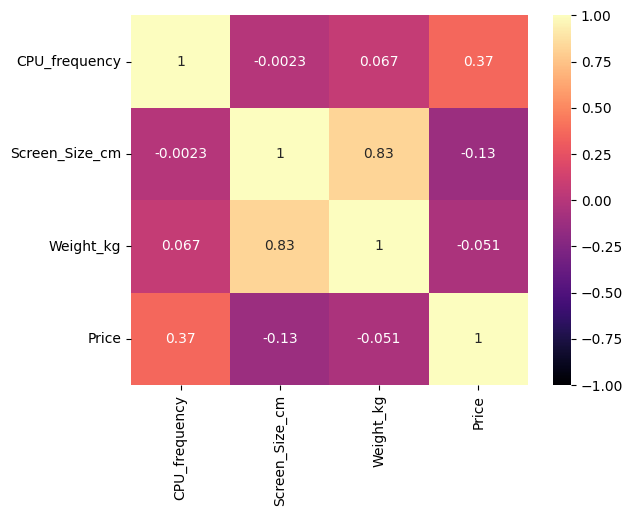

In [317]:
sns.heatmap(data_corr, vmin=-1,vmax=1,annot=True, cmap="magma")

In [318]:
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')

In [319]:
features = ['Category','GPU', 'OS', 'CPU_core','RAM_GB', 'Storage_GB_SSD']

<Axes: >

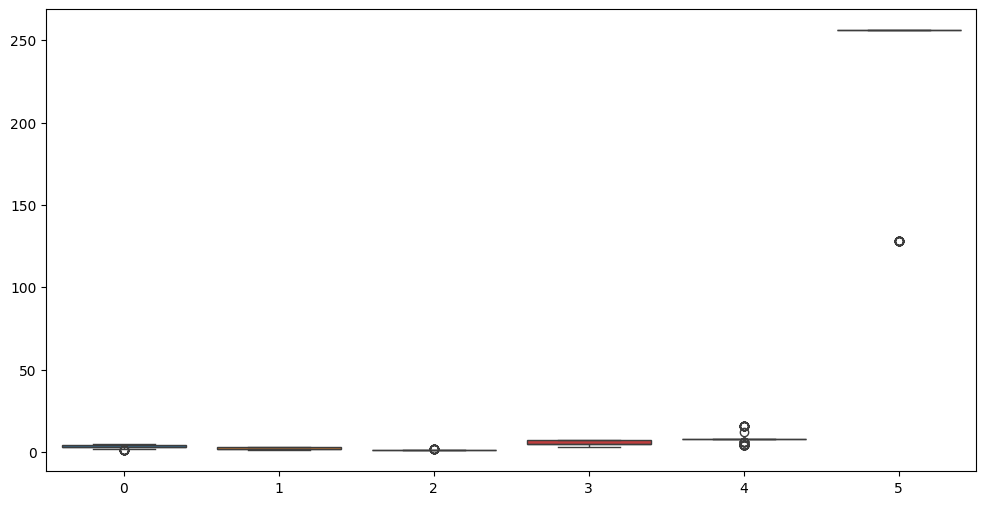

In [320]:
plt.figure(figsize=(12, 6))
sns.boxplot(df[features].values)

In [321]:
df[features].head()

,Category,GPU,OS,CPU_core,RAM_GB,Storage_GB_SSD
0,4,2,1,5,8,256
1,3,1,1,3,4,256
2,3,1,1,7,8,256
3,4,2,1,5,8,128
4,4,2,1,7,8,256


In [322]:
df[features].describe()

,Category,GPU,OS,CPU_core,RAM_GB,Storage_GB_SSD
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,7.882353,245.781513
std,0.776533,0.638282,0.235790,1.241787,2.482603,34.765316
min,1.000000,1.000000,1.000000,3.000000,4.000000,128.000000
25%,3.000000,2.000000,1.000000,5.000000,8.000000,256.000000
50%,3.000000,2.000000,1.000000,5.000000,8.000000,256.000000
75%,4.000000,3.000000,1.000000,7.000000,8.000000,256.000000
max,5.000000,3.000000,2.000000,7.000000,16.000000,256.000000


In [323]:
# From describe method we can conclude that RAM_GB and Storage_GB_SSD needs normalization

In [324]:
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')

In [325]:
normalized_feature = ["RAM_GB","Storage_GB_SSD"]
for column in normalized_feature:
    to_normalize_data = df[column]
    normalized_feat = to_normalize_data/to_normalize_data.max()
    df = pd.concat([df,normalized_feat.rename(f"{column}_Normalized")],axis=1)
    features.remove(column)
    features.append(f"{column}_Normalized")
    # del to_normalize_data
df.drop(columns=normalized_feature,inplace=True)

In [326]:
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_cm', 'CPU_frequency', 'Weight_kg', 'Price',
       'RAM_GB_Normalized', 'Storage_GB_SSD_Normalized'],
      dtype='object')

In [327]:
# RAM_GB_Normalized = df["RAM_GB"]/df["RAM_GB"].max()
# df = pd.concat([df,RAM_GB_Normalized.rename("RAM_GB_Normalized")], axis=1)
# del df["RAM_GB"]
# df.columns

In [328]:
features

['Category',
 'GPU',
 'OS',
 'CPU_core',
 'RAM_GB_Normalized',
 'Storage_GB_SSD_Normalized']

In [329]:
df[features].describe()

,Category,GPU,OS,CPU_core,RAM_GB_Normalized,Storage_GB_SSD_Normalized
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,0.492647,0.960084
std,0.776533,0.638282,0.235790,1.241787,0.155163,0.135802
min,1.000000,1.000000,1.000000,3.000000,0.250000,0.500000
25%,3.000000,2.000000,1.000000,5.000000,0.500000,1.000000
50%,3.000000,2.000000,1.000000,5.000000,0.500000,1.000000
75%,4.000000,3.000000,1.000000,7.000000,0.500000,1.000000
max,5.000000,3.000000,2.000000,7.000000,1.000000,1.000000


<Axes: >

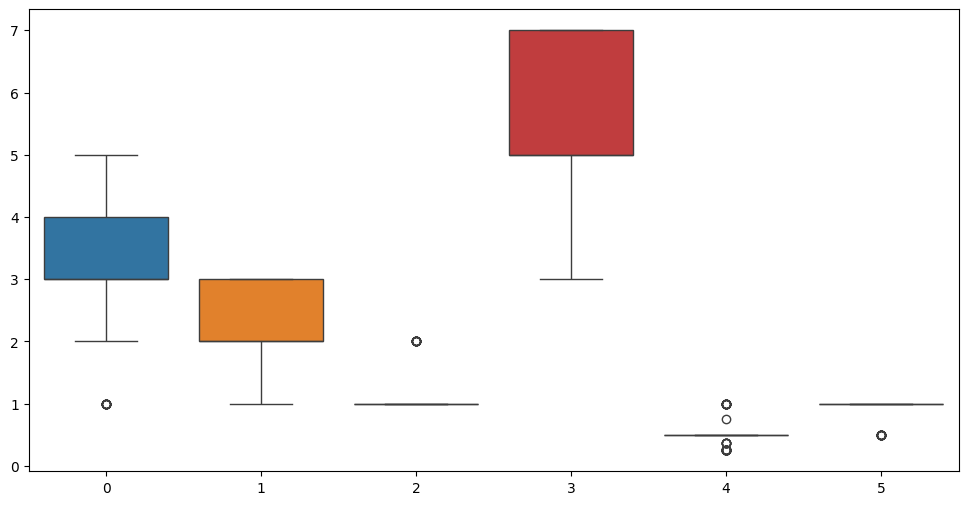

In [330]:
plt.figure(figsize=(12, 6))
sns.boxplot(df[features].values)

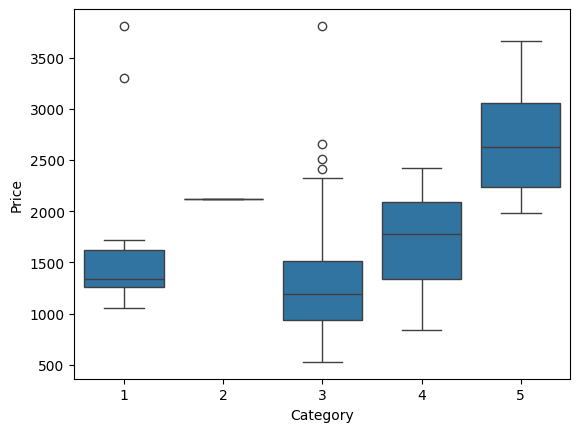

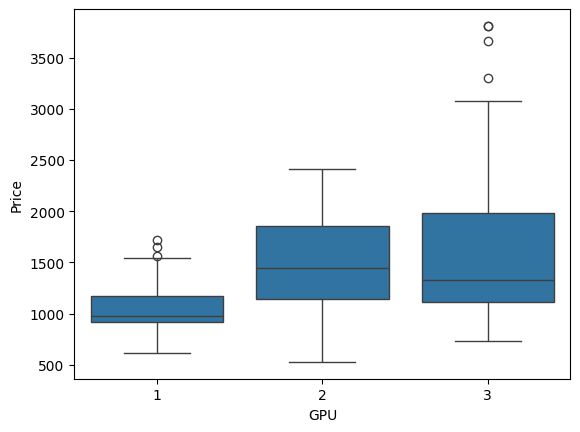

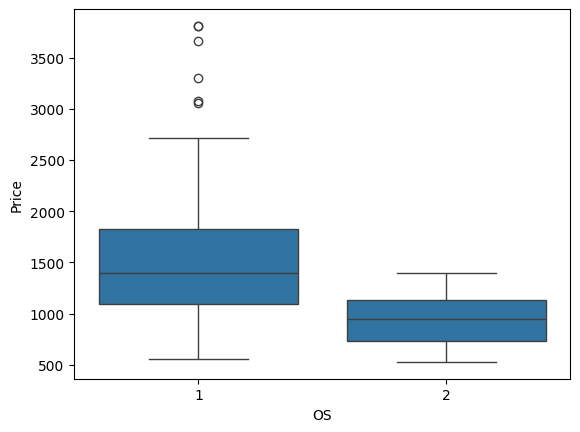

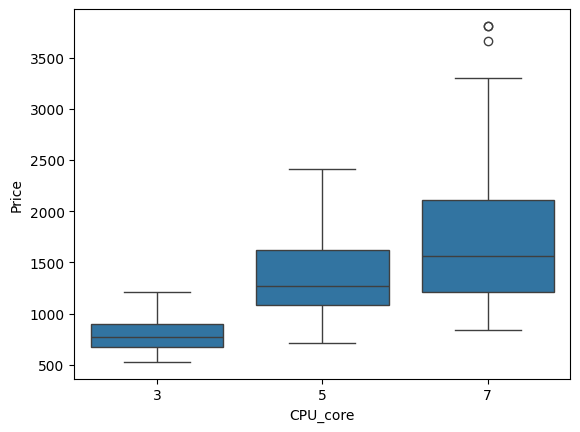

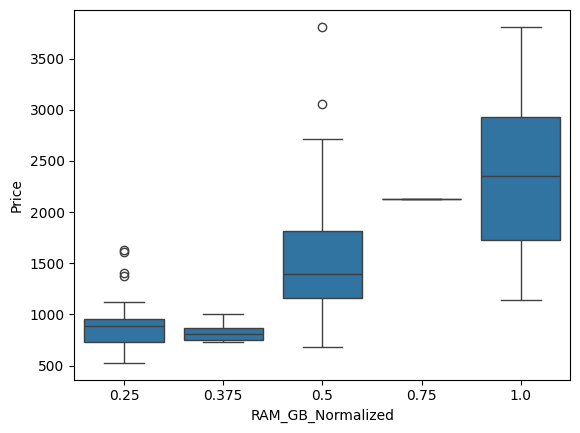

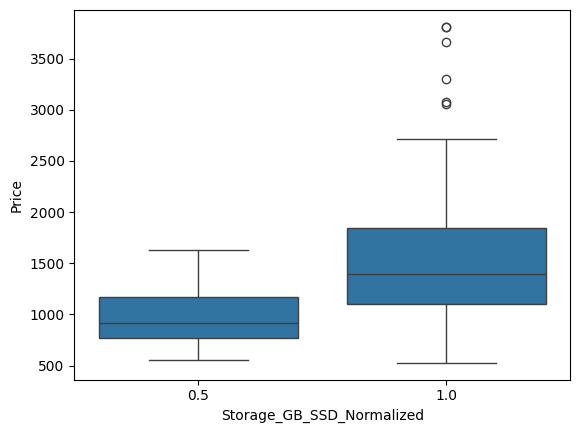

In [331]:
for column in features:
    sns.boxplot(x=column,y="Price",data=df)
    plt.show()

In [335]:
print(df.describe())
print(df.describe(include=["object"]))

         Category         GPU          OS    CPU_core  Screen_Size_cm  \
count  238.000000  238.000000  238.000000  238.000000      234.000000   
mean     3.205882    2.151261    1.058824    5.630252       37.269615   
std      0.776533    0.638282    0.235790    1.241787        2.971365   
min      1.000000    1.000000    1.000000    3.000000       30.480000   
25%      3.000000    2.000000    1.000000    5.000000       35.560000   
50%      3.000000    2.000000    1.000000    5.000000       38.100000   
75%      4.000000    3.000000    1.000000    7.000000       39.624000   
max      5.000000    3.000000    2.000000    7.000000       43.942000   

       CPU_frequency   Weight_kg        Price  RAM_GB_Normalized  \
count     238.000000  233.000000   238.000000         238.000000   
mean        2.360084    1.862232  1462.344538           0.492647   
std         0.411393    0.494332   574.607699           0.155163   
min         1.200000    0.810000   527.000000           0.250000   
25

In [341]:
to_group_list = ["GPU","CPU_core","Price"]
datas = df[to_group_list]
grouped = datas.groupby(["GPU","CPU_core"], as_index=False).mean()
grouped

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [ ]:
pd.pivot_table(grouped)